### Mobile Price Classification using SKLearn Custom Script in Sagemaker

In [12]:
import os
import sagemaker
from sklearn.model_selection import train_test_split
import boto3
import pandas as pd
import numpy as np

os.environ['AWS_DEFAULT_REGION'] = "eu-north-1"

sm_boto3 = boto3.client("sagemaker", region_name = "eu-north-1")
sess = sagemaker.Session()
region = sess.boto_session.region_name
bucket = 'mobpriceclass-bucket' # Mention the created S3 bucket name here
print("Using bucket " + bucket)

Using bucket mobpriceclass-bucket


In [3]:
df = pd.read_csv("mob_price_classification_train.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [11]:
df['price_range'].value_counts(normalize=True)

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

In [4]:
#These variables should be boolean
print("Categories in 'blue' variable:     ",end=" " )
print(df['blue'].unique())

print("Categories in 'dual sim' variable:  ",end=" ")
print(df['dual_sim'].unique())

print("Categories in 'four g ' variable:",end=" " )
print(df['four_g'].unique())

print("Categories in 'three g ' variable:     ",end=" " )
print(df['three_g'].unique())

print("Categories in 'wifi' variable:     ",end=" " )
print(df['wifi'].unique())

#This variable should be categorical
print("Categories in 'price range' variable:     ",end=" " )
print(df['price_range'].unique())

Categories in 'blue' variable:      [0 1]
Categories in 'dual sim' variable:   [0 1]
Categories in 'four g ' variable: [0 1]
Categories in 'three g ' variable:      [0 1]
Categories in 'wifi' variable:      [1 0]
Categories in 'price range' variable:      [1 2 3 0]


In [5]:
# define numerical & categorical columns
categorical_features = ["blue", "dual_sim", "three_g", "four_g", 'wifi', 'price_range']
numeric_features = df.columns.difference(categorical_features)

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'touch_screen'],
      dtype='object')

We have 6 categorical features : ['blue', 'dual_sim', 'three_g', 'four_g', 'wifi', 'price_range']


In [32]:
df = pd.read_csv("mob_price_classification_train.csv")
df = df.astype( {k: v for k, v in zip(categorical_features,  ['object'] * len(categorical_features))} )
#df['price_range'] = df['price_range'].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [40]:
features = list(df.columns)

In [41]:
label = features.pop(-1)
label

'price_range'

In [42]:
x = df[features]
y = df[label]

In [43]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [44]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: object

In [45]:
x.shape

(2000, 20)

In [46]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=0)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 20)
(300, 20)
(1700,)
(300,)


In [50]:
trainX = pd.DataFrame(X_train)
trainX[label] = y_train

testX = pd.DataFrame(X_test)
testX[label] = y_test

In [26]:
print(trainX.shape)
print(testX.shape)

(1700, 21)
(300, 21)


In [51]:
trainX.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1452,1450,0,2.1,0,1,0,31,0.6,114,5,...,1573,1639,794,11,5,9,0,1,1,1
1044,1218,1,2.8,1,3,0,39,0.8,150,7,...,1122,1746,1667,10,0,12,0,0,0,1
1279,1602,0,0.6,0,12,0,58,0.4,170,1,...,1259,1746,3622,17,2,17,0,1,1,3
674,1034,0,2.6,1,2,1,45,0.3,190,3,...,182,1293,969,15,1,7,1,0,0,0
1200,530,0,2.4,0,1,0,32,0.3,88,6,...,48,1012,959,17,7,6,0,1,0,0


In [52]:
trainX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [53]:
testX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [54]:
trainX.to_csv("train-V-1.csv",index = False)
testX.to_csv("test-V-1.csv", index = False)

In [55]:
bucket

'mobpriceclass-bucket'

In [56]:
# send data to S3. SageMaker will take training data from s3
sk_prefix = "sagemaker/mobile_price_classification/sklearncontainer"
trainpath = sess.upload_data(
    path="train-V-1.csv", bucket=bucket, key_prefix=sk_prefix
)

testpath = sess.upload_data(
    path="test-V-1.csv", bucket=bucket, key_prefix=sk_prefix
)
print(trainpath)
print(testpath)

s3://mobpriceclass-bucket/sagemaker/mobile_price_classification/sklearncontainer/train-V-1.csv
s3://mobpriceclass-bucket/sagemaker/mobile_price_classification/sklearncontainer/test-V-1.csv


In [58]:
%%writefile script.py

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import sklearn
import joblib
import boto3
import pathlib
from io import StringIO 
import argparse
import joblib
import os
import numpy as np
import pandas as pd
    
def model_fn(model_dir):
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf
    
if __name__ == "__main__":

    print("[INFO] Extracting arguments")
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script.
    parser.add_argument("--n_estimators", type=int, default=100)
    parser.add_argument("--random_state", type=int, default=0)

    # Data, model, and output directories
    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))
    parser.add_argument("--train-file", type=str, default="train-V-1.csv")
    parser.add_argument("--test-file", type=str, default="test-V-1.csv")

    args, _ = parser.parse_known_args()
    
    print("SKLearn Version: ", sklearn.__version__)
    print("Joblib Version: ", joblib.__version__)

    print("[INFO] Reading data")
    print()
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    
    features = list(train_df.columns)
    label = features.pop(-1)
    
    print("Building training and testing datasets")
    print()
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df[label]
    y_test = test_df[label]

    print('Column order: ')
    print(features)
    print()
    
    print("Label column is: ",label)
    print()
    
    print("Data Shape: ")
    print()
    print("---- SHAPE OF TRAINING DATA (85%) ----")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("---- SHAPE OF TESTING DATA (15%) ----")
    print(X_test.shape)
    print(y_test.shape)
    print()
    
  
    print("Training RandomForest Model.....")
    print()
    model =  RandomForestClassifier(n_estimators=args.n_estimators, random_state=args.random_state, verbose = 3,n_jobs=-1)
    model.fit(X_train, y_train)
    print()
    

    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model,model_path)
    print("Model persisted at " + model_path)
    print()

    
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test,y_pred_test)
    test_rep = classification_report(y_test,y_pred_test)

    print()
    print("---- METRICS RESULTS FOR TESTING DATA ----")
    print()
    print("Total Rows are: ", X_test.shape[0])
    print('[TESTING] Model Accuracy is: ', test_acc)
    print('[TESTING] Testing Report: ')
    print(test_rep)

Overwriting script.py


In [60]:
from sagemaker.sklearn.estimator import SKLearn

FRAMEWORK_VERSION = "0.23-1"

sklearn_estimator = SKLearn(
    entry_point="script.py",
    role="arn:aws:iam::590183953381:role/sagemakerRole",
    instance_count=1,
    instance_type="ml.m5.large",
    framework_version=FRAMEWORK_VERSION,
    base_job_name="RF-custom-sklearn",
    hyperparameters={
        "n_estimators": 100,
        "random_state": 0,
    },
    use_spot_instances = True,
    max_wait = 7200,
    max_run = 3600
)

In [61]:
# launch training job, with asynchronous call
sklearn_estimator.fit({"train": trainpath, "test": testpath}, wait=True)
# sklearn_estimator.fit({"train": datapath}, wait=True)

INFO:sagemaker:Creating training-job with name: RF-custom-sklearn-2024-03-07-10-49-55-997


2024-03-07 10:50:01 Starting - Starting the training job...
2024-03-07 10:50:16 Starting - Preparing the instances for training...
2024-03-07 10:50:45 Downloading - Downloading input data...
2024-03-07 10:51:15 Downloading - Downloading the training image...
2024-03-07 10:52:06 Training - Training image download completed. Training in progress.
2024-03-07 10:52:06 Uploading - Uploading generated training model2024-03-07 10:52:01,382 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2024-03-07 10:52:01,387 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-07 10:52:01,438 sagemaker_sklearn_container.training INFO     Invoking user training script.
2024-03-07 10:52:01,606 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-07 10:52:01,620 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-07 10:52:01,637 sagemaker-training-toolkit INFO

In [62]:
sklearn_estimator.latest_training_job.wait(logs="None")
artifact = sm_boto3.describe_training_job(
    TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

print("Model artifact persisted at " + artifact)


2024-03-07 10:52:22 Starting - Preparing the instances for training
2024-03-07 10:52:22 Downloading - Downloading the training image
2024-03-07 10:52:22 Training - Training image download completed. Training in progress.
2024-03-07 10:52:22 Uploading - Uploading generated training model
2024-03-07 10:52:22 Completed - Training job completed
Model artifact persisted at s3://sagemaker-eu-north-1-590183953381/RF-custom-sklearn-2024-03-07-10-49-55-997/output/model.tar.gz


In [30]:
artifact

's3://sagemaker-us-east-1-566373416292/RF-custom-sklearn-2023-06-23-17-51-03-767/output/model.tar.gz'

In [63]:
from sagemaker.sklearn.model import SKLearnModel
from time import gmtime, strftime

model_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
model = SKLearnModel(
    name =  model_name,
    model_data=artifact,
    role="arn:aws:iam::590183953381:role/sagemakerRole",
    entry_point="script.py",
    framework_version=FRAMEWORK_VERSION,
)

In [64]:
model_name

'Custom-sklearn-model-2024-03-07-10-55-07'

In [67]:
##Endpoints deployment
endpoint_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("EndpointName={}".format(endpoint_name))

predictor = model.deploy(
    initial_instance_count=1,
    instance_type="ml.m5.large",
    endpoint_name=endpoint_name,
)

EndpointName=Custom-sklearn-model-2024-03-07-10-56-03


INFO:sagemaker:Creating model with name: Custom-sklearn-model-2024-03-07-10-55-07
INFO:sagemaker:Creating endpoint-config with name Custom-sklearn-model-2024-03-07-10-56-03
INFO:sagemaker:Creating endpoint with name Custom-sklearn-model-2024-03-07-10-56-03


----!

In [68]:
endpoint_name

'Custom-sklearn-model-2024-03-07-10-56-03'

In [71]:
testX[features][0:2].values.tolist()

[[1454, 1, 0.5, 1, 1, 0, 34, 0.7, 83, 4, 3, 250, 1033, 3419, 7, 5, 5, 1, 1, 0],
 [1092,
  1,
  0.5,
  1,
  10,
  0,
  11,
  0.5,
  167,
  3,
  14,
  468,
  571,
  737,
  14,
  4,
  11,
  0,
  1,
  0]]

In [95]:
actual = y_test.values.tolist()
predicted = predictor.predict(testX[features].values.tolist())
print(actual)
print(predicted)
print(len(actual))
print(len(predicted))

[3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3, 1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1, 2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3, 3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3, 2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0, 2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2, 2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3, 3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2, 3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2, 3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0]
[3 0 2 1 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 3

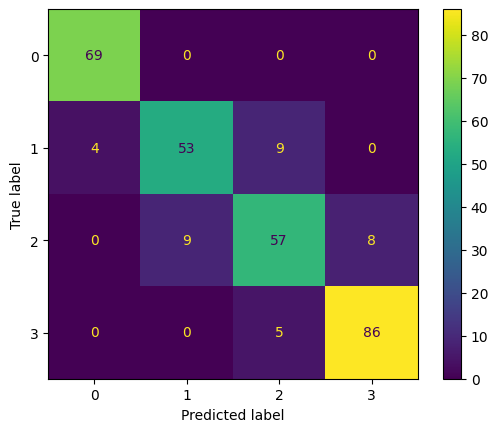

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc

confusion_matrix = confusion_matrix(actual, predicted)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show() 

405     3
1190    0
1132    2
731     2
1754    2
       ..
575     2
982     3
723     0
1487    2
801     0
Name: price_range, Length: 300, dtype: object

In [ ]:
sm_boto3.delete_endpoint(EndpointName=endpoint_name)